<a href="https://colab.research.google.com/github/h0806449f/TensorFlow/blob/main/Tibame_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

深度學習 概要步驟
1. 隨機係數
2. 設定 Loss function  
`係數的變化, 帶動 Loss 變化 -> 斜率`
3. 調整所有係數, 讓 Loss 最小

In [42]:
# import datasets

from tensorflow.keras.datasets import mnist
( (x_train, y_train), (x_test, y_test) ) = mnist.load_data()

In [43]:
# check shape

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

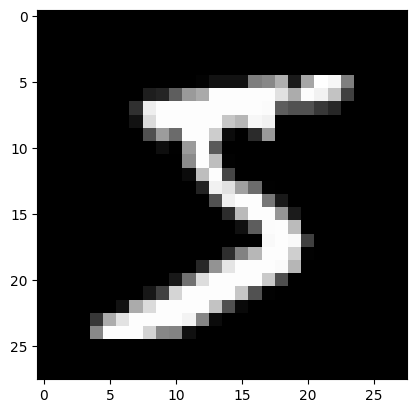

In [44]:
# check image (pandas & matplotlib)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")  # cmap="gray_r"

激活函式 (Activation)  
`中間層`
1. Sigmoid : 所有中間層如果都使用sigmoid -> 會有梯度消失的問題  
    越前面的係數, 對 Loss 影響越小 (因為經過了越多次 0~1 相乘)  

2. Relu : 激活前數值為0, 激活後斜率為1 -> 舒緩梯度消失的問題  
  
`輸出層`
1. Sigmoid : 答案類別,不互斥
2. SoftMax : 互斥


In [45]:
# choose models
# models(架構) : Sequential(一層疊一層), Model(自由疊層)
# layers : Dense(全連接層)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    Dense(256, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]

model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Loss Function (損失函式)
1. MSE : 預測值與真實值的距離越小越好  
  $(predict - true)^2$

2. CrossEntorpy : 為了避免模型都預測某一邊, CE設計於模型都預測某一邊時, Loss會被放大  
    僅有預測值與資料分布越接近時, Loss值會越小

In [46]:
# compile

# model.compile(loss="mse", metrics=["accuracy"])

# 計算機率的案例時, 較好的Loss函式 Crossentropy

from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [47]:
# 將答案轉成機率

from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

y_train[0], y_train_categorical[0]  # check

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [48]:
# 將問題標準化
# 因 tensorflow 隨機的weight 有配合
# 因 tensorflow 建議 x(0 ~ 1) or x(-1 ~ 1)
# reshape 支援 -1 自動計算

x_train_normalize = x_train.reshape(60000, 784)
x_test_normalize = x_test.reshape(10000, 784)

x_train_normalize.shape, x_test_normalize.shape  # check

((60000, 784), (10000, 784))

In [49]:
# fit
# batch_size : 檢視幾筆資料之後 調整一次係數
# epochs : 所有資料 想要看過幾次
# validation_split : 部分資料用於驗證參數表現

# 原60000筆資料 -> 0.1 validation (54000筆資料) -> 100 batch_size (540次調整)
# 20 epochs -> 共 540 * 20 次調整 

# model.fit(x_train_normalize,
#       y_train_categorical,
#       batch_size=100,
#       epochs=20,
#       validation_split=0.1)

# model checkpoint

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_list = [
    ModelCheckpoint("mnist.h5", save_best_only=True),  # 自動將最好的參數儲存為 mnist.h5
    EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=7)
]

model.fit(x_train_normalize,
      y_train_categorical,
      batch_size=100,
      epochs=20,
      validation_split=0.1,
      callbacks=callback_list)

Epoch 1/20
540/540 [==============================] - 4s 6ms/step - loss: 5.0510 - accuracy: 0.8872 - val_loss: 1.0216 - val_accuracy: 0.9313
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 0.7803 - accuracy: 0.9430 - val_loss: 0.5996 - val_accuracy: 0.9498
Epoch 3/20
540/540 [==============================] - 5s 9ms/step - loss: 0.4787 - accuracy: 0.9576 - val_loss: 0.6706 - val_accuracy: 0.9535
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3736 - accuracy: 0.9655 - val_loss: 0.6381 - val_accuracy: 0.9612
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3103 - accuracy: 0.9707 - val_loss: 0.5975 - val_accuracy: 0.9623
Epoch 6/20
540/540 [==============================] - 5s 9ms/step - loss: 0.2533 - accuracy: 0.9756 - val_loss: 0.5572 - val_accuracy: 0.9653
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.2337 - accuracy: 0.9783 - val_loss: 0.4983 - val_accuracy: 0.9715
Epoch 

In [54]:
model.predict(x_test_normalize)

313/313 [==============================] - 1s 3ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 3.6755735e-28, ..., 5.6162927e-26,
        2.3285163e-35, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.7070041e-29,
        2.6267502e-38, 2.2748073e-23],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [51]:
model.evaluate(x_test_normalize, y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.5781 - accuracy: 0.9659


[0.578123927116394, 0.9659000039100647]

argmax()  
1. 不帶參數, 會將所有數值都轉為一維, 並列出最大值index
2. 代數參數  
    2.1 axis=0 直的看  
    2.2 axis=1 橫的看

In [58]:
model.predict(x_test_normalize).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [59]:
from sklearn.metrics import confusion_matrix

pre = model.predict(x_test_normalize).argmax(axis=1)
mat = confusion_matrix(y_test, pre)

pd.DataFrame(mat,
        index=["{}(true)".format(i) for i in range(10)],
        columns=["{}(true)".format(i) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,0(true),1(true),2(true),3(true),4(true),5(true),6(true),7(true),8(true),9(true)
0(true),964,0,1,2,0,5,4,1,2,1
1(true),0,1120,4,2,0,3,3,1,1,1
2(true),10,4,990,1,6,1,2,14,4,0
3(true),4,1,7,969,0,18,0,4,2,5
4(true),0,1,6,0,955,0,4,2,0,14
5(true),2,0,1,8,1,863,10,1,4,2
6(true),6,2,0,0,9,4,934,1,2,0
7(true),1,1,11,5,3,3,0,997,0,7
8(true),8,1,13,14,5,16,4,4,901,8
9(true),1,3,2,5,15,5,1,7,4,966


In [64]:
# 找出預測錯誤的index

import numpy as np

false_predict_index = np.nonzero(y_test != pre)[0]
false_predict_index[:100]  # 取前100

array([ 151,  247,  257,  259,  268,  320,  321,  340,  358,  381,  404,
        412,  445,  448,  456,  495,  527,  542,  582,  619,  629,  659,
        684,  691,  707,  720,  740,  760,  787,  810,  844,  900,  938,
        947,  951,  956,  965, 1012, 1014, 1032, 1039, 1107, 1112, 1156,
       1166, 1212, 1224, 1226, 1232, 1247, 1251, 1256, 1289, 1290, 1319,
       1325, 1328, 1414, 1441, 1444, 1494, 1527, 1530, 1549, 1553, 1562,
       1569, 1584, 1609, 1671, 1678, 1681, 1694, 1717, 1737, 1751, 1754,
       1782, 1790, 1800, 1828, 1855, 1874, 1878, 1883, 1901, 1930, 1941,
       1952, 1982, 1984, 1987, 2018, 2023, 2035, 2053, 2093, 2098, 2109,
       2118])

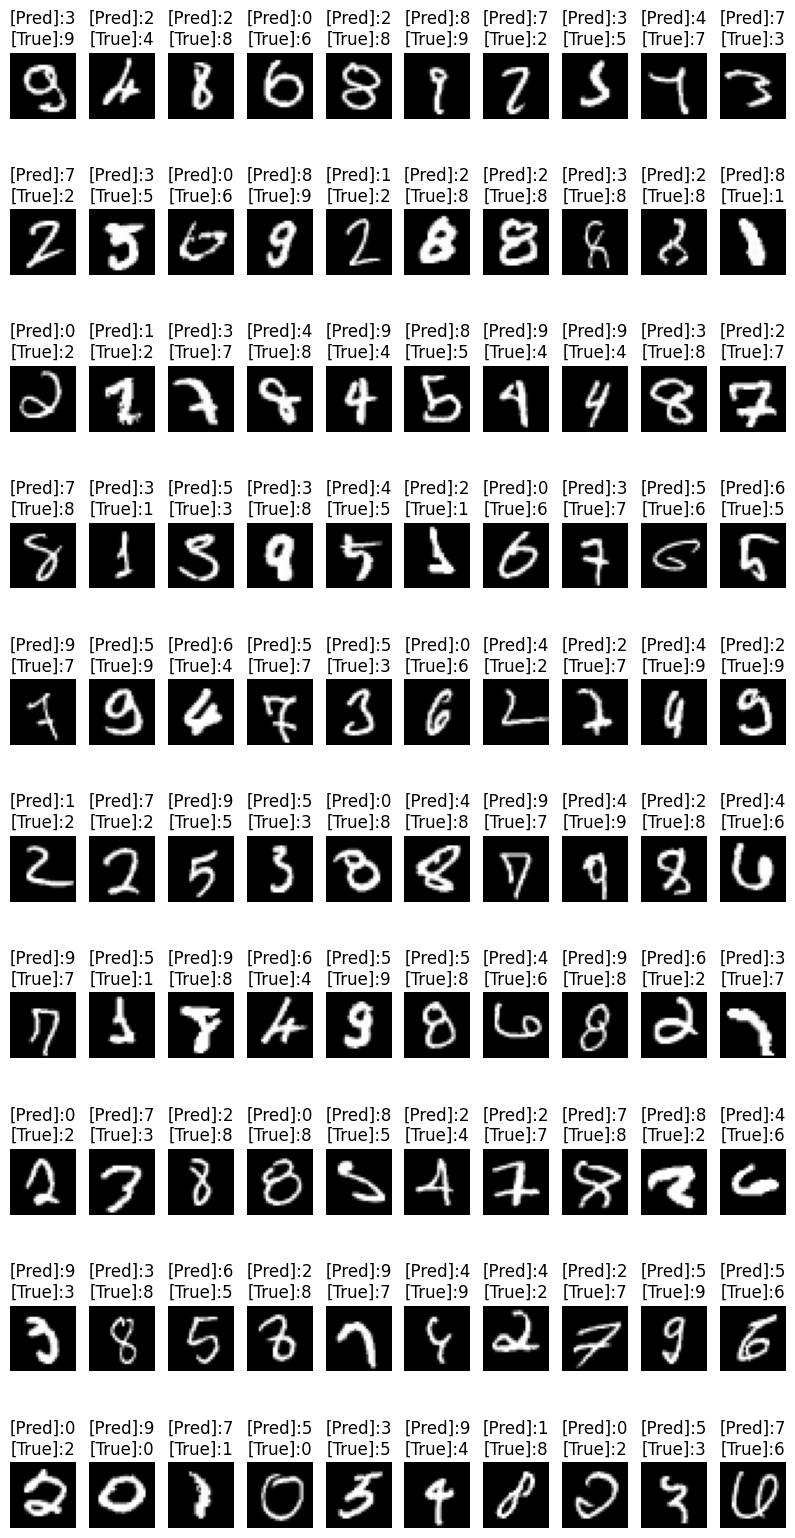

In [67]:
# subplot

plt.figure(figsize=(10, 20))
# 預測錯誤的 預測值
false_prediction = pre[false_predict_index]
# 預測錯誤的 真實值
false_prediction_true_number = y_test[false_predict_index]
# 預測錯誤的 圖片
false_prediction_image = x_test[false_predict_index]

for i in range(len(false_predict_index[:100])):
    plt.subplot(10, 10, i+1)
    plt.imshow(false_prediction_image[i], cmap="gray")
    plt.axis("off")
    title = "[Pred]:{}\n[True]:{}".format(false_prediction[i], false_prediction_true_number[i])
    plt.title(title)